# Training the hand gestures model with Turi Create

On the small dataset this model gets 100% training accuracy, 80% test set accuracy (3 out of 15 images wrong).

In [1]:
import turicreate as tc

%matplotlib inline
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
tc.__version__, tc.version_info.build_number

('6.4.1', '154518')

## Load the training set

In [3]:
train_data = tc.image_analysis.load_images("/Users/admin/Desktop/CoreML/Foodle/Dataset/train", with_path=True)

In [4]:
train_data["label"] = train_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))

In [5]:
train_data.head()

Columns:
	path	str
	image	Image
	label	str

Rows: 10

Data:
+-------------------------------+------------------------+-------+
|              path             |         image          | label |
+-------------------------------+------------------------+-------+
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍅   |
| /Users/admin/Desktop/CoreM... | Height: 224 Width: 224 |   🍎   |
+-------------------------------+------------------------+-------+
[10 rows x 3 columns]

In [6]:
len(train_data)

28

In [7]:
train_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |   28  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   3   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|   🍎   |   11  |
|   🍅   |   9   |
|   🥒   |   8   |
+-------+-------+


## Load the test set

In [8]:
test_data = tc.image_analysis.load_images("/Users/admin/Desktop/CoreML/Foodle/Dataset/test", with_path=True)
test_data["label"] = test_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))

In [9]:
test_data["label"].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |   15  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   3   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|   🍅   |   5   |
|   🍎   |   5   |
|   🥒   |   5   |
+-------+-------+


## Explore the training data


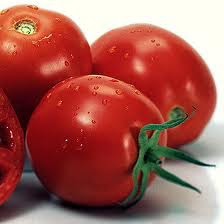
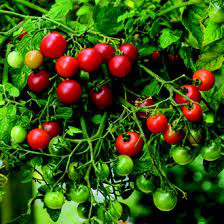
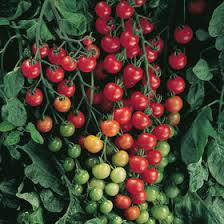
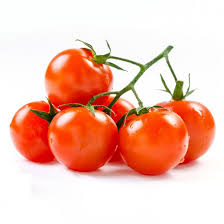
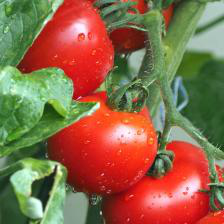
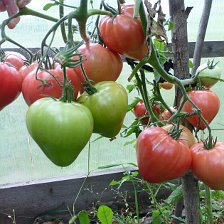
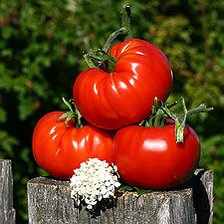
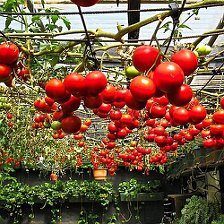
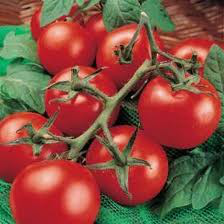
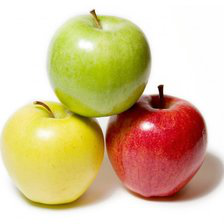
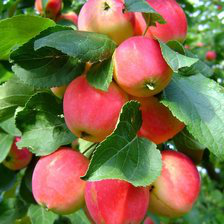
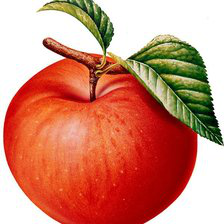
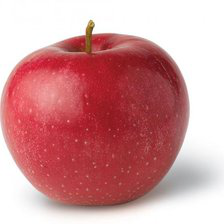
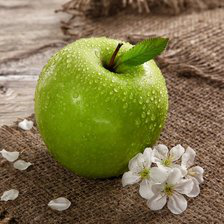
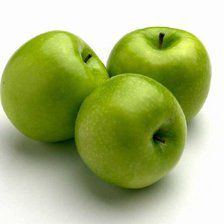
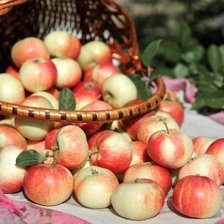
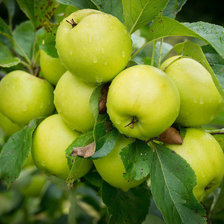
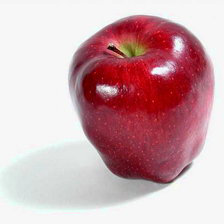
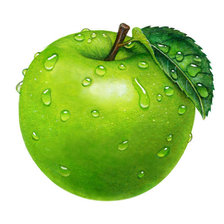
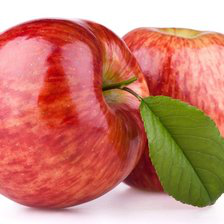
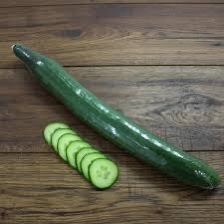
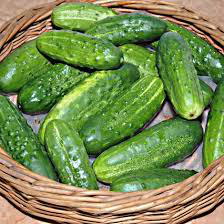
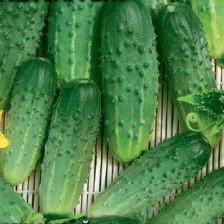
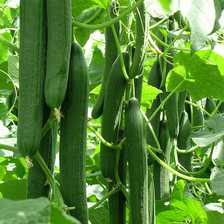
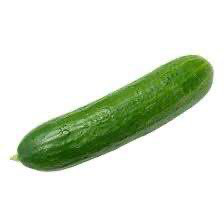
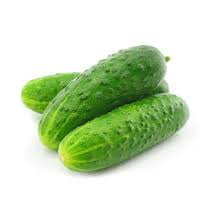
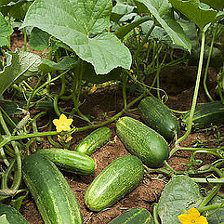
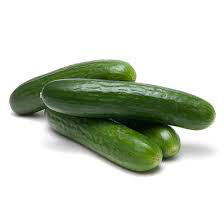

In [10]:
# Explore interactively -- this is only supported on macOS.
train_data.explore()

Look at an image:

In [11]:
img = train_data[7]["image"]
img, type(img), type(img.pixel_data), img.pixel_data.dtype

(Height: 224px
 Width: 224px
 Channels: 3,
 turicreate.data_structures.image.Image,
 numpy.ndarray,
 dtype('uint8'))

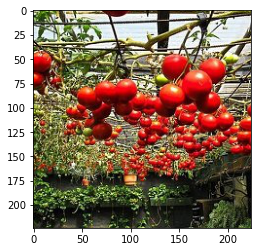

In [12]:
plt.imshow(img.pixel_data)

## Train the model

In [13]:
model_type = "squeezenet_v1.1"

In [14]:
%time model = tc.image_classifier.create(train_data, target="label", model=model_type, \
                                         verbose=True, max_iterations=100)

Using GPU (Apple M1) to extract features.

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 28               | 131.739ms    | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 28

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 2002

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 6        | 0.006556  | 0.046604     | 0.392857          |

Warning: Reached max step size.

| 1         | 14       | 25.000000 | 0.099800     | 0.750000          |

| 2         | 15       | 25.000000 | 0.111607     | 0.642857          |

| 3         | 19       | 1.965392  | 0.143312     | 0.892857          |

| 4         | 21       | 1.916020  | 0.161136     | 0.892857          |

| 9         | 31       | 1.007008  | 0.252226     | 1.000000          |

| 23        | 53       | 0.667419  | 0.471900     | 1.000000          |

+-----------+----------+-----------+--------------+-------------------+

CPU times: user 2.26 s, sys: 92.8 ms, total: 2.35 s
Wall time: 1.74 s


In [15]:
model.summary()

Class                                    : ImageClassifier

Schema
------
Number of classes                        : 3
Number of feature columns                : 1
Input image shape                        : (3, 227, 227)

Training summary
----------------
Number of examples                       : 28
Training loss                            : 0.0587
Training time (sec)                      : 1.7375



In [16]:
model.classifier

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 2002
Number of examples             : 28
Number of classes              : 3
Number of feature columns      : 1
Number of unpacked features    : 1000

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 23
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.3327

Settings
--------
Log-likelihood                 : 0.0587

Highest Positive Coefficients
-----------------------------
(intercept)                    : 0.0523
__image_features__[675]        : 0.0478
__image_features__[147]        : 0.0336
__image_features__[349]        : 0.0306
__image_features__[279]        : 0.0278

Lowest Negative Coefficients
----------------------------
__image_features__[779]        : -0.0591
__image

In [17]:
model.input_image_shape

(3, 227, 227)

In [18]:
model.model

'squeezenet_v1.1'

In [19]:
model.classes

['🍅', '🍎', '🥒']

## Evaluate the trained model

In [20]:
metrics = model.evaluate(train_data)
metrics["accuracy"]

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 28               | 53.982ms     | 100%             |

+------------------+--------------+------------------+

1.0

In [21]:
metrics = model.evaluate(test_data)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 15               | 34.063ms     | 100%             |

+------------------+--------------+------------------+

In [22]:
for k, v in metrics.items():
    print(k, "\n", v)

accuracy 
 0.8666666666666667
f1_score 
 0.8659932659932661
log_loss 
 0.8749205839991437
precision 
 0.8777777777777778
recall 
 0.8666666666666667
auc 
 0.9166666666666666
roc_curve 
 +-----------+-----+-----+---+----+-------+
| threshold | fpr | tpr | p | n  | class |
+-----------+-----+-----+---+----+-------+
|    0.0    | 1.0 | 1.0 | 5 | 10 |   0   |
|   0.001   | 0.4 | 1.0 | 5 | 10 |   0   |
|   0.002   | 0.3 | 1.0 | 5 | 10 |   0   |
|   0.003   | 0.3 | 1.0 | 5 | 10 |   0   |
|   0.004   | 0.2 | 1.0 | 5 | 10 |   0   |
|   0.005   | 0.2 | 1.0 | 5 | 10 |   0   |
|   0.006   | 0.2 | 1.0 | 5 | 10 |   0   |
|   0.007   | 0.2 | 1.0 | 5 | 10 |   0   |
|   0.008   | 0.2 | 1.0 | 5 | 10 |   0   |
|   0.009   | 0.2 | 1.0 | 5 | 10 |   0   |
+-----------+-----+-----+---+----+-------+
[3003 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
confusion_matrix 
 +--------------+-----------------+-------

In [23]:
metrics["confusion_matrix"]

Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 5

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      🍅       |        🍅        |   5   |
|      🥒       |        🍎        |   1   |
|      🍎       |        🍎        |   4   |
|      🍎       |        🍅        |   1   |
|      🥒       |        🥒        |   4   |
+--------------+-----------------+-------+
[5 rows x 3 columns]

In [24]:
predictions = model.predict(test_data)
predictions

dtype: str
Rows: 15
['🍅', '🍅', '🍅', '🍅', '🍅', '🍎', '🍅', '🍎', '🍎', '🍎', '🥒', '🥒', '🥒', '🥒', '🍎']

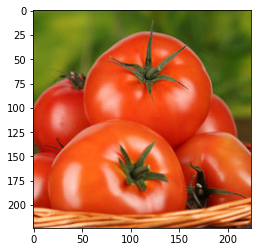

In [25]:
plt.imshow(test_data[1]["image"].pixel_data)

In [26]:
output = model.classify(test_data)
output.print_rows(num_rows=15, num_columns=2)

+-------+--------------------+
| class |    probability     |
+-------+--------------------+
|   🍅   | 0.982347084059347  |
|   🍅   | 0.9461553261659218 |
|   🍅   | 0.9987903851240659 |
|   🍅   | 0.8118808786048465 |
|   🍅   | 0.9966483953301267 |
|   🍎   | 0.9968143211038091 |
|   🍅   | 0.8018021967242968 |
|   🍎   | 0.9998021715933036 |
|   🍎   | 0.5276271315699811 |
|   🍎   | 0.9998305846236546 |
|   🥒   | 0.9970694188990883 |
|   🥒   | 0.9989143184886937 |
|   🥒   | 0.9963961824165075 |
|   🥒   | 0.8545961605265603 |
|   🍎   | 0.9998973547246582 |
+-------+--------------------+
[15 rows x 2 columns]




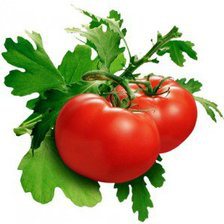
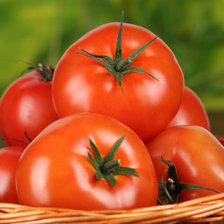
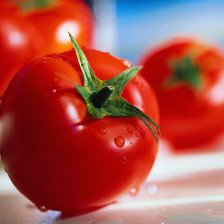
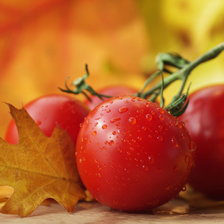
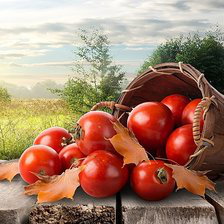
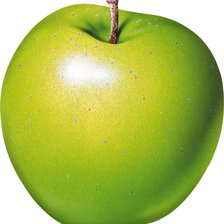
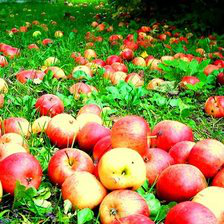
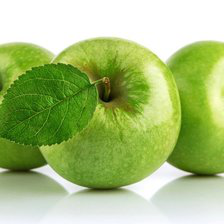
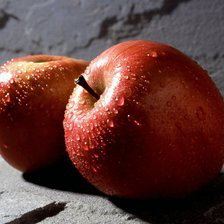
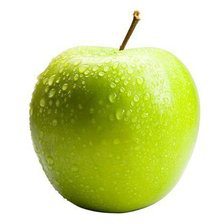
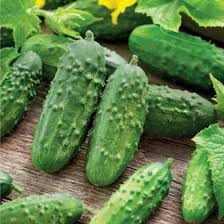
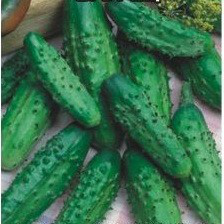
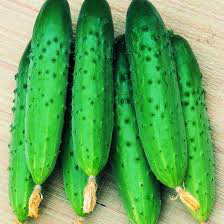
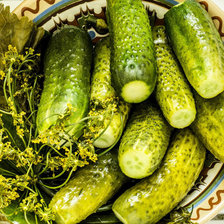
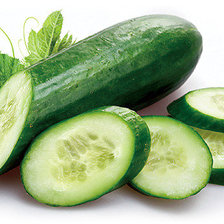

In [27]:
imgs_with_pred = test_data.add_columns(output)
imgs_with_pred.explore()

## Export to Core ML

In [ ]:
model.export_coreml("/Users/admin/Desktop/CoreML/Foodle/VegetablesTuri.mlmodel")